In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def create_visualization(file_path, save_path):
    print("Генерація візуалізації...")
    df = pd.read_csv(file_path, sep=';')
    
    # Беремо топ-10 регіонів за порушеннями
    target_col = 'Кількість складених матеріалів з ознаками кримінальних правопорушень всього'
    top_10 = df.nlargest(10, target_col).sort_values(target_col, ascending=True)
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(top_10['Назва регіону'], top_10[target_col], color='skyblue')
    
    plt.title('Топ-10 регіонів за кількістю виявлених правопорушень', fontsize=14)
    plt.xlabel('Кількість матеріалів (од.)')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Додаємо цифри на бари
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                 f' {int(bar.get_width())}', va='center')

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path)
    print(f"Графік збережено у: {save_path}")


Генерація візуалізації...
Графік збережено у: ../reports/figures/top_regions_chart.png


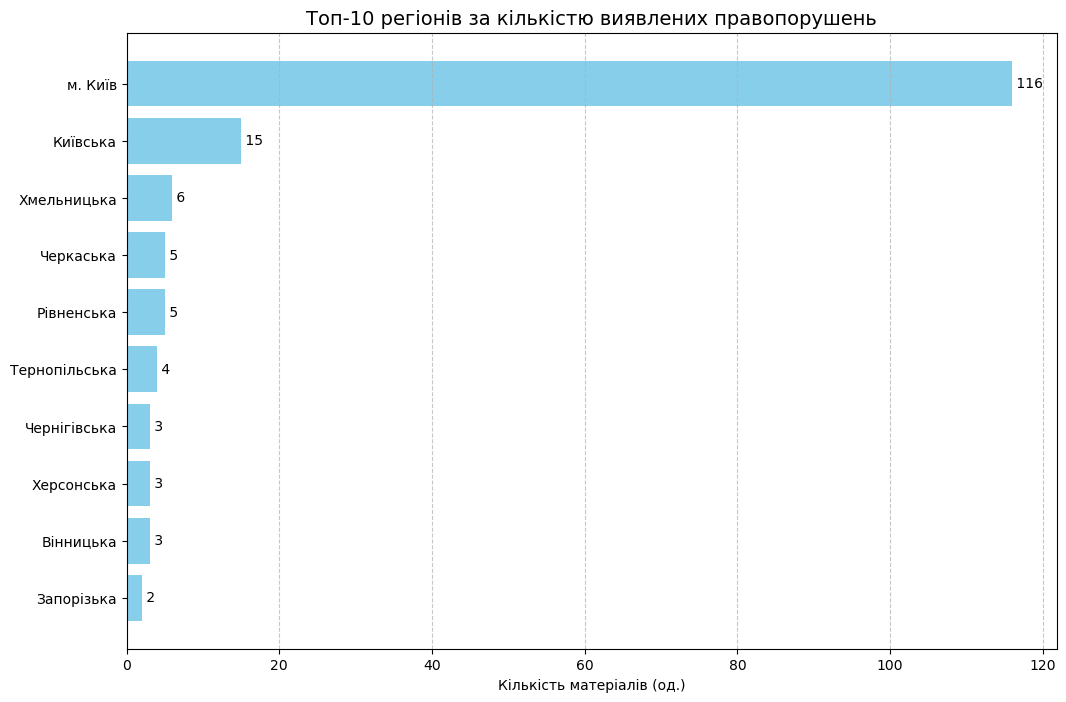

In [3]:
if __name__ == "__main__":
    INPUT = "../data/raw/kontrolno-perevirochna-robota.csv"
    OUTPUT = "../reports/figures/top_regions_chart.png"
    create_visualization(INPUT, OUTPUT)